In [1]:
from selfclean import SelfClean
from selfclean.cleaner.selfclean import PretrainingType

2024-10-19 13:56:13.692 | INFO     | Running on: cuda
2024-10-19 13:56:13.693 | INFO     | Data loaded: there are 196 train images and 4 batches with a batch size of 64.
/opt/conda/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
2024-10-19 13:58:17.518 | INFO     | Student and Teacher are built: they are both pretrained_imagenet_dino network.
2024-10-19 13:58:17.522 | INFO     | Found checkpoint at /home/jovyan/Presentation_SelfClean/Notebooks/DINO-Dataset/checkpoints/model_best.pth


Creating dataset representation:   0%|          | 0/4 [00:00<?, ?it/s]

2024-10-19 14:02:39.414 | INFO     | Fitting cleaner on representation space: (196, 192)


Creating distance matrix:   0%|          | 0/2 [00:00<?, ?it/s]

Processing possible near duplicates:   0%|          | 0/2 [00:00<?, ?it/s]

Processing possible irrelevant samples: 0it [00:00, ?it/s]

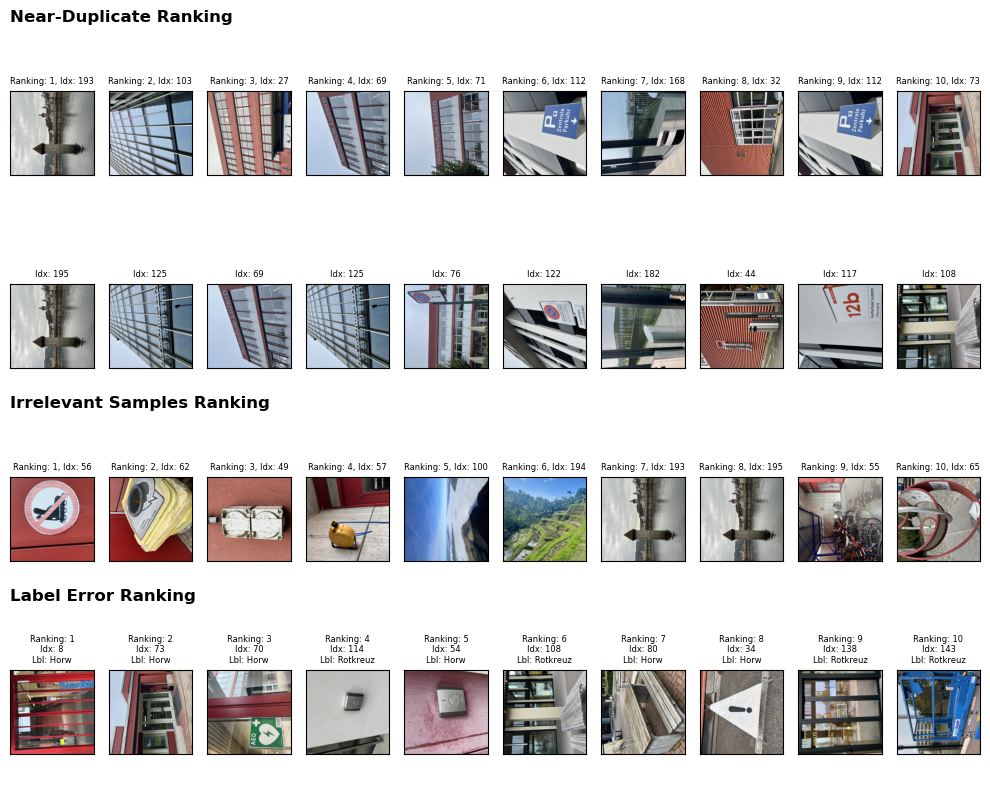

In [2]:
selfclean = SelfClean(
    # displays the top-7 images from each error type
    # per default this option is disabled
    plot_top_N=10, 
)

# run on image folder
issues = selfclean.run_on_image_folder(
    input_path="../Dataset",
    pretraining_type=PretrainingType.DINO, #IMAGENET_VIT / IMAGENET / DINO
    epochs=30,
)



In [3]:
# get the data quality issue rankings
df_near_duplicates = issues.get_issues("near_duplicates", return_as_df=True)

2024-10-19 14:03:41.356 | WARNING  | Returning as dataframe requires extensive memory.


In [4]:
df_irrelevants = issues.get_issues("irrelevants", return_as_df=True)

2024-10-19 14:03:41.390 | WARNING  | Returning as dataframe requires extensive memory.


In [5]:
df_label_errors = issues.get_issues("label_errors", return_as_df=True)

2024-10-19 14:03:41.397 | WARNING  | Returning as dataframe requires extensive memory.


In [12]:
df_near_duplicates.to_csv("ImageNetTiny_NearDuplicates.csv")
df_irrelevants.to_csv("ImageNetTiny_Irrelevant.csv")
df_label_errors.to_csv("ImageNetTiny_LabelErrors.csv")

In [6]:
df_near_duplicates

,indices_1,indices_2,scores,path_indices_1,path_indices_2,label_indices_1,label_indices_2
0,193,195,1.788139e-07,../Dataset/Rotkreuz/Rotkreuz_2552.JPG,../Dataset/Rotkreuz/.ipynb_checkpoints/Rotkreu...,Rotkreuz,Rotkreuz
1,103,125,5.101770e-02,../Dataset/Rotkreuz/Rotkreuz_2453.JPG,../Dataset/Rotkreuz/Rotkreuz_2476.JPG,Rotkreuz,Rotkreuz
2,27,69,6.937492e-02,../Dataset/Horw/Horw_2375.JPG,../Dataset/Horw/Horw_2419.JPG,Horw,Horw
3,69,125,8.128691e-02,../Dataset/Horw/Horw_2419.JPG,../Dataset/Rotkreuz/Rotkreuz_2476.JPG,Horw,Rotkreuz
4,71,76,8.368921e-02,../Dataset/Horw/Horw_2422.JPG,../Dataset/Horw/Horw_2427.JPG,Horw,Horw
...,...,...,...,...,...,...,...
19105,95,111,5.450394e-01,../Dataset/Horw/Horw_2447.JPG,../Dataset/Rotkreuz/Rotkreuz_2461.JPG,Horw,Rotkreuz
19106,30,49,5.454907e-01,../Dataset/Horw/Horw_2378.JPG,../Dataset/Horw/Horw_2397.JPG,Horw,Horw
19107,95,122,5.485916e-01,../Dataset/Horw/Horw_2447.JPG,../Dataset/Rotkreuz/Rotkreuz_2473.JPG,Horw,Rotkreuz
19108,41,49,5.531881e-01,../Dataset/Horw/Horw_2389.JPG,../Dataset/Horw/Horw_2397.JPG,Horw,Horw
